In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1 = pd.read_csv("Mumbai House Prices.csv")
df1.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [3]:
df1.columns

Index(['bhk', 'type', 'locality', 'area', 'price', 'price_unit', 'region',
       'status', 'age'],
      dtype='object')

In [4]:
df1['locality'].unique()

array(['Lak And Hanware The Residency Tower',
       'Radheya Sai Enclave Building No 2', 'Romell Serene', ...,
       'Ahuja Prasadam Phase III', 'HBS Marineview', 'Hubtown Serene'],
      dtype=object)

In [5]:
df1['region'].unique()

array(['Andheri West', 'Naigaon East', 'Borivali West', 'Panvel',
       'Mira Road East', 'Parel', 'Boisar', 'Santacruz East',
       'Badlapur East', 'Fort', 'Badlapur West', 'Khopoli', 'Chembur',
       'Jogeshwari West', 'Vasai', 'Kalamboli', 'Powai', 'Ghansoli',
       'Thane West', 'Vikhroli', 'Bhiwandi', 'Airoli', 'Ambernath West',
       'Borivali East', 'Virar', 'Kharghar', 'Ulwe', 'Kamothe',
       'Jogeshwari East', 'Mulund West', 'Palghar', 'Goregaon West',
       'Taloja', 'Rasayani', 'Ghatkopar East', 'Ulhasnagar', 'Dombivali',
       'Kewale', 'Nala Sopara', 'Goregaon East', 'Kandivali East',
       'Kurla', 'Andheri East', 'Dahisar', 'Karanjade', 'Mahim', 'Vashi',
       'Malad West', 'Girgaon', 'Dadar West', 'Bandra West',
       'Kandivali West', 'Kalyan West', 'Neral', 'Kalyan East', 'Karjat',
       'Ghatkopar West', 'Dronagiri', 'Mulund East', 'Navade', 'Ambivali',
       'Agripada', 'Owale', 'Ville Parle East', 'Kalwa', 'Khar',
       'Santacruz West', 'Nerul', 'K

In [6]:
df1['type'].unique()

array(['Apartment', 'Villa', 'Studio Apartment', 'Independent House',
       'Penthouse'], dtype=object)

In [7]:
df2=df1.drop(['locality','status'],axis='columns')
df2.shape

(76038, 7)

In [8]:
df2.head()

,bhk,type,area,price,price_unit,region,age
0,3,Apartment,685,2.50,Cr,Andheri West,New
1,2,Apartment,640,52.51,L,Naigaon East,New
2,2,Apartment,610,1.73,Cr,Borivali West,New
3,2,Apartment,876,59.98,L,Panvel,New
4,2,Apartment,659,94.11,L,Mira Road East,New


In [9]:
df2["Amount"] = df2['price'].astype(str) +" "+ df2["price_unit"]
df2.head()

,bhk,type,area,price,price_unit,region,age,Amount
0,3,Apartment,685,2.50,Cr,Andheri West,New,2.5 Cr
1,2,Apartment,640,52.51,L,Naigaon East,New,52.51 L
2,2,Apartment,610,1.73,Cr,Borivali West,New,1.73 Cr
3,2,Apartment,876,59.98,L,Panvel,New,59.98 L
4,2,Apartment,659,94.11,L,Mira Road East,New,94.11 L


In [10]:
def fun(x):
    if 'Cr' in x or 'cr' in x:
        s=str(x).split(" ")[0]
        s1=str(int(float(s)*100))
        return s1
    else:
        s=str(x).split(" ")[0]
        return s

In [11]:
df2['Amount']=df2['Amount'].map(lambda x:fun(x))

In [12]:
df2['Amount']

0          250
1        52.51
2          173
3        59.98
4        94.11
         ...  
76033      700
76034     1200
76035     1000
76036      425
76037     2500
Name: Amount, Length: 76038, dtype: object

In [13]:
df2.head()

,bhk,type,area,price,price_unit,region,age,Amount
0,3,Apartment,685,2.50,Cr,Andheri West,New,250
1,2,Apartment,640,52.51,L,Naigaon East,New,52.51
2,2,Apartment,610,1.73,Cr,Borivali West,New,173
3,2,Apartment,876,59.98,L,Panvel,New,59.98
4,2,Apartment,659,94.11,L,Mira Road East,New,94.11


In [14]:
df3=df2.drop(['price','price_unit'],axis='columns')
df3.shape

(76038, 6)

In [15]:
df3.head()

,bhk,type,area,region,age,Amount
0,3,Apartment,685,Andheri West,New,250
1,2,Apartment,640,Naigaon East,New,52.51
2,2,Apartment,610,Borivali West,New,173
3,2,Apartment,876,Panvel,New,59.98
4,2,Apartment,659,Mira Road East,New,94.11


In [16]:
df4 = df3.rename({'Amount': 'Price_in_Lakhs'}, axis='columns')
df4.head()

,bhk,type,area,region,age,Price_in_Lakhs
0,3,Apartment,685,Andheri West,New,250
1,2,Apartment,640,Naigaon East,New,52.51
2,2,Apartment,610,Borivali West,New,173
3,2,Apartment,876,Panvel,New,59.98
4,2,Apartment,659,Mira Road East,New,94.11


In [17]:
df4.isnull().sum()

bhk               0
type              0
area              0
region            0
age               0
Price_in_Lakhs    0
dtype: int64

In [18]:
df4['bhk'].unique()

array([ 3,  2,  5,  1,  4,  6,  9,  8, 10,  7], dtype=int64)

In [19]:
df4.dtypes

bhk                int64
type              object
area               int64
region            object
age               object
Price_in_Lakhs    object
dtype: object

In [20]:
df4['Price_in_Lakhs'] = df4['Price_in_Lakhs'].astype('float')
df4.dtypes

bhk                 int64
type               object
area                int64
region             object
age                object
Price_in_Lakhs    float64
dtype: object

In [21]:
df5=df4.copy()
df5['Price_per_sqft']=df5['Price_in_Lakhs']*100000/df5['area']
df5.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.00,36496.350365
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376


In [22]:
df6=df5.replace('Unknown',value=np.NaN)
df6.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.00,36496.350365
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376


In [23]:
df6.isnull().sum()

bhk                   0
type                  0
area                  0
region                0
age               14609
Price_in_Lakhs        0
Price_per_sqft        0
dtype: int64

In [24]:
df7=df6.dropna()
df7.shape

(61429, 7)

In [25]:
df7.isnull().sum()

bhk               0
type              0
area              0
region            0
age               0
Price_in_Lakhs    0
Price_per_sqft    0
dtype: int64

In [26]:
len(df7.region.unique())

205

In [27]:
df7.region

0          Andheri West
1          Naigaon East
2         Borivali West
3                Panvel
4        Mira Road East
              ...      
76025        Thane West
76026        Thane West
76027        Thane West
76028        Thane West
76029        Thane West
Name: region, Length: 61429, dtype: object

In [28]:
df7.region = df7.region.apply(lambda x: x.strip())
region_stats = df7['region'].value_counts(ascending=False)
region_stats

C:\Users\akans\AppData\Local\Temp\ipykernel_3012\1575840944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.region = df7.region.apply(lambda x: x.strip())


region
Mira Road East         9759
Thane West             7857
Dombivali              2637
Kandivali East         2267
Kharghar               2028
                       ... 
Peddar Road               1
Kamathipura               1
Usarghar Gaon             1
Vevoor                    1
Pestom Sagar Colony       1
Name: count, Length: 205, dtype: int64

In [29]:
len(region_stats[region_stats>10])

109

In [30]:
len(region_stats[region_stats<=10])

96

In [31]:
region_stats_less_than_10 = region_stats[region_stats<=10]
region_stats_less_than_10

region
Kanjurmarg East        10
Sector 20 Kamothe      10
Saphale                10
Koproli                10
Dahisar West            9
                       ..
Peddar Road             1
Kamathipura             1
Usarghar Gaon           1
Vevoor                  1
Pestom Sagar Colony     1
Name: count, Length: 96, dtype: int64

In [32]:
df7.region = df7.region.apply(lambda x: 'other' if x in region_stats_less_than_10 else x)
len(df7.region.unique())

C:\Users\akans\AppData\Local\Temp\ipykernel_3012\4203179303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.region = df7.region.apply(lambda x: 'other' if x in region_stats_less_than_10 else x)


110

In [33]:
df7.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.00,36496.350365
1,2,Apartment,640,Naigaon East,New,52.51,8204.687500
2,2,Apartment,610,Borivali West,New,173.00,28360.655738
3,2,Apartment,876,Panvel,New,59.98,6847.031963
4,2,Apartment,659,Mira Road East,New,94.11,14280.728376


In [34]:
df7.dtypes

bhk                 int64
type               object
area                int64
region             object
age                object
Price_in_Lakhs    float64
Price_per_sqft    float64
dtype: object

In [35]:
df7[df7.area/df7.bhk<250].head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,3,Apartment,685,Andheri West,New,250.0,36496.350365
49,3,Apartment,685,Andheri West,New,250.0,36496.350365
131,2,Apartment,486,Badlapur East,New,36.0,7407.407407
132,2,Apartment,486,Badlapur East,New,36.0,7407.407407
457,2,Studio Apartment,415,Girgaon,Resale,95.0,22891.566265


In [36]:
df8 = df7[~(df7.area/df7.bhk<250)]
df8.shape

(60507, 7)

In [37]:
df8.Price_per_sqft.describe()

count     60507.000000
mean      15127.587992
std        9641.326201
min         646.766169
25%        8348.432380
50%       12536.162006
75%       19909.672243
max      125000.000000
Name: Price_per_sqft, dtype: float64

In [38]:
df8.shape

(60507, 7)

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('region'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df9 = remove_pps_outliers(df8)
df9.shape

(44828, 7)

Text(0, 0.5, 'Count')

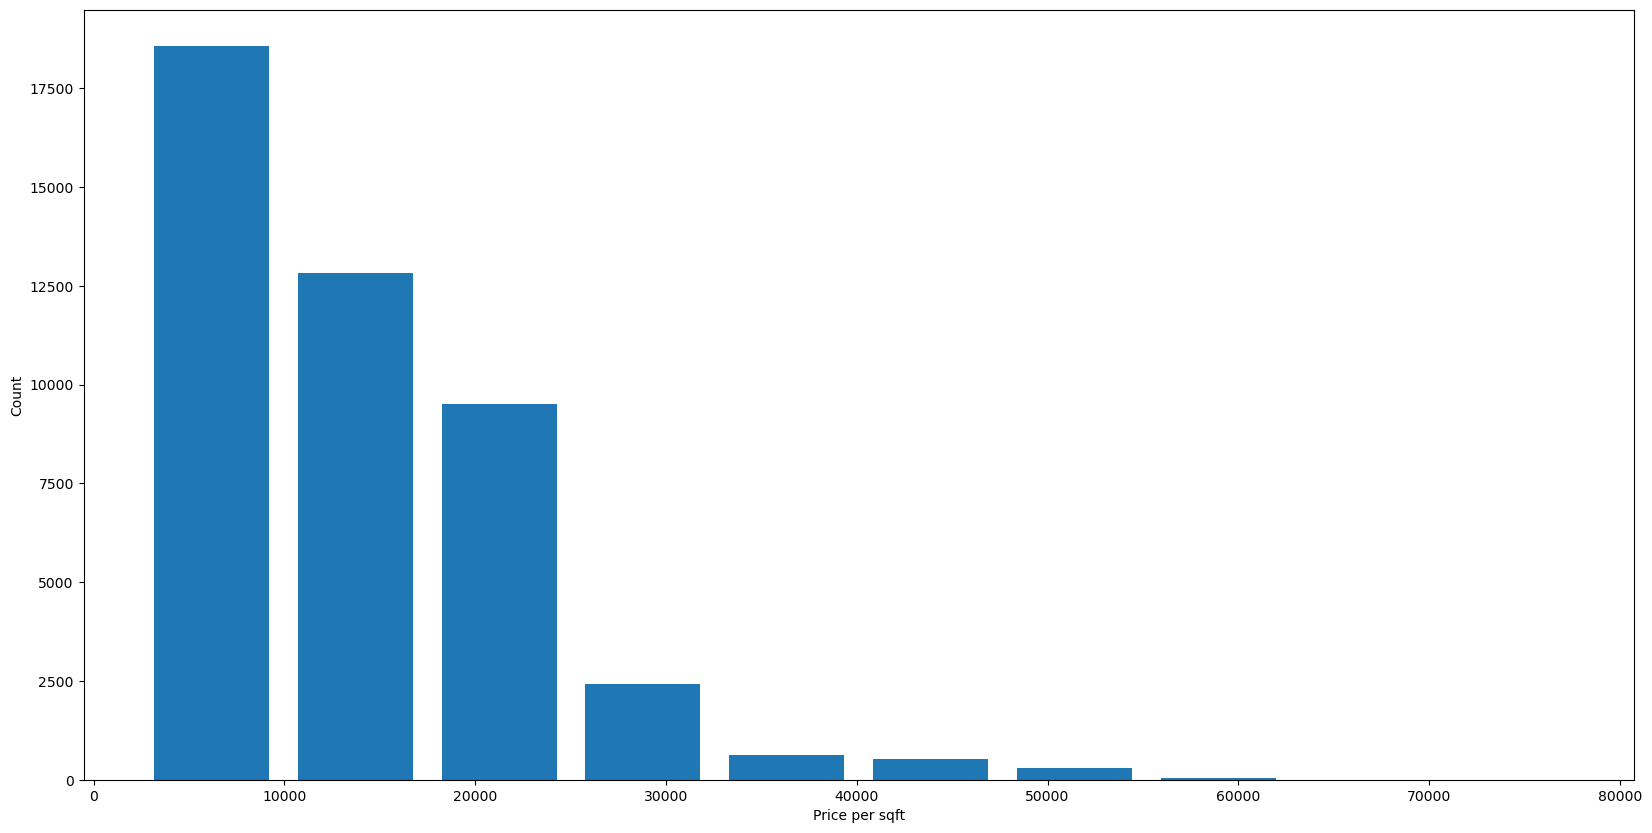

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [41]:
df9['region'].unique()

array(['Agripada', 'Airoli', 'Ambernath East', 'Ambernath West',
       'Andheri East', 'Andheri West', 'Anjurdive', 'Badlapur East',
       'Badlapur West', 'Bandra East', 'Bandra Kurla Complex',
       'Bandra West', 'Belapur', 'Bhandup East', 'Bhandup West',
       'Bhayandar East', 'Bhayandar West', 'Bhiwandi', 'Boisar',
       'Borivali East', 'Borivali West', 'Byculla', 'Chembur', 'Colaba',
       'Dadar East', 'Dadar West', 'Dahisar', 'Deonar', 'Diva',
       'Dombivali', 'Dronagiri', 'Ghansoli', 'Ghatkopar East',
       'Ghatkopar West', 'Girgaon', 'Goregaon East', 'Goregaon West',
       'Jogeshwari East', 'Jogeshwari West', 'Juhu', 'Juinagar',
       'Kalamboli', 'Kalwa', 'Kalyan East', 'Kalyan West', 'Kamothe',
       'Kandivali East', 'Kandivali West', 'Kanjurmarg', 'Karanjade',
       'Karjat', 'Kasheli', 'Khar', 'Kharghar', 'Khopoli',
       'Koper Khairane', 'Kurla', 'Lower Parel', 'Mahalaxmi', 'Mahim',
       'Malad East', 'Malad West', 'Marine Lines', 'Matunga', 'Mazag

In [42]:
df9.head(10)

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,2,Apartment,650,Agripada,Resale,262.0,40307.692308
1,1,Apartment,803,Agripada,Resale,225.0,28019.925280
2,1,Apartment,684,Agripada,Resale,170.0,24853.801170
3,1,Apartment,545,Agripada,Resale,160.0,29357.798165
4,2,Apartment,1650,Agripada,Resale,350.0,21212.121212
5,2,Apartment,1179,Agripada,Resale,275.0,23324.851569
6,3,Apartment,1702,Agripada,New,450.0,26439.482961
7,2,Apartment,1270,Agripada,New,350.0,27559.055118
8,3,Apartment,2060,Agripada,Resale,475.0,23058.252427
9,2,Apartment,1650,Agripada,Resale,340.0,20606.060606


In [43]:
df10=df9.copy()
df10.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,2,Apartment,650,Agripada,Resale,262.0,40307.692308
1,1,Apartment,803,Agripada,Resale,225.0,28019.925280
2,1,Apartment,684,Agripada,Resale,170.0,24853.801170
3,1,Apartment,545,Agripada,Resale,160.0,29357.798165
4,2,Apartment,1650,Agripada,Resale,350.0,21212.121212


In [85]:
df10.head()
max_value=df10['Price_in_Lakhs'].max()
max
print(max_value)

5555.0


In [45]:
import matplotlib.pyplot as plt
import matplotlib

In [46]:
def chart(df, region):
    bhk2 = df[(df.region == region) & (df.bhk == 2)]
    bhk3 = df[(df.region == region) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    
    plt.scatter(bhk2.area, bhk2.Price_in_Lakhs, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.area, bhk3.Price_in_Lakhs, marker='+', color='green', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(region)
    plt.legend()

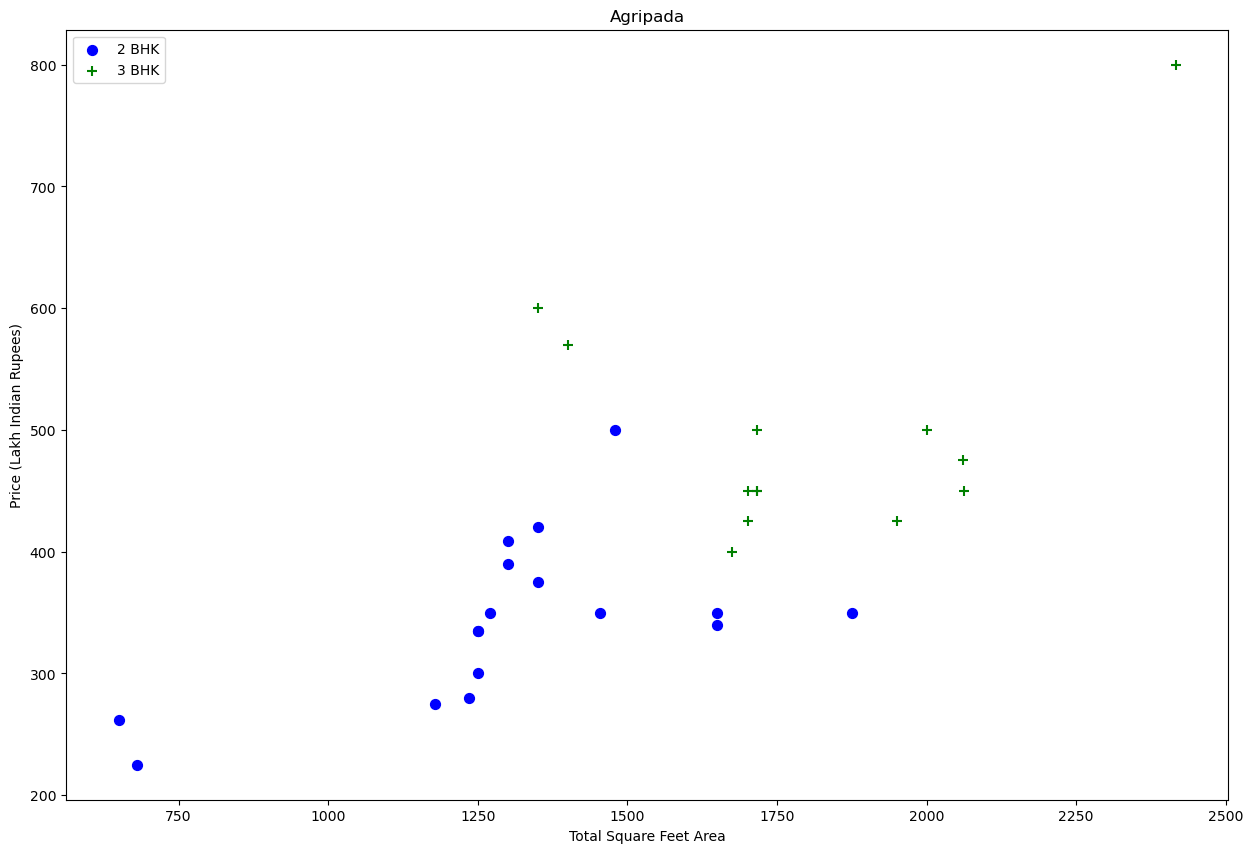

In [47]:
chart(df10, "Agripada")
plt.show()

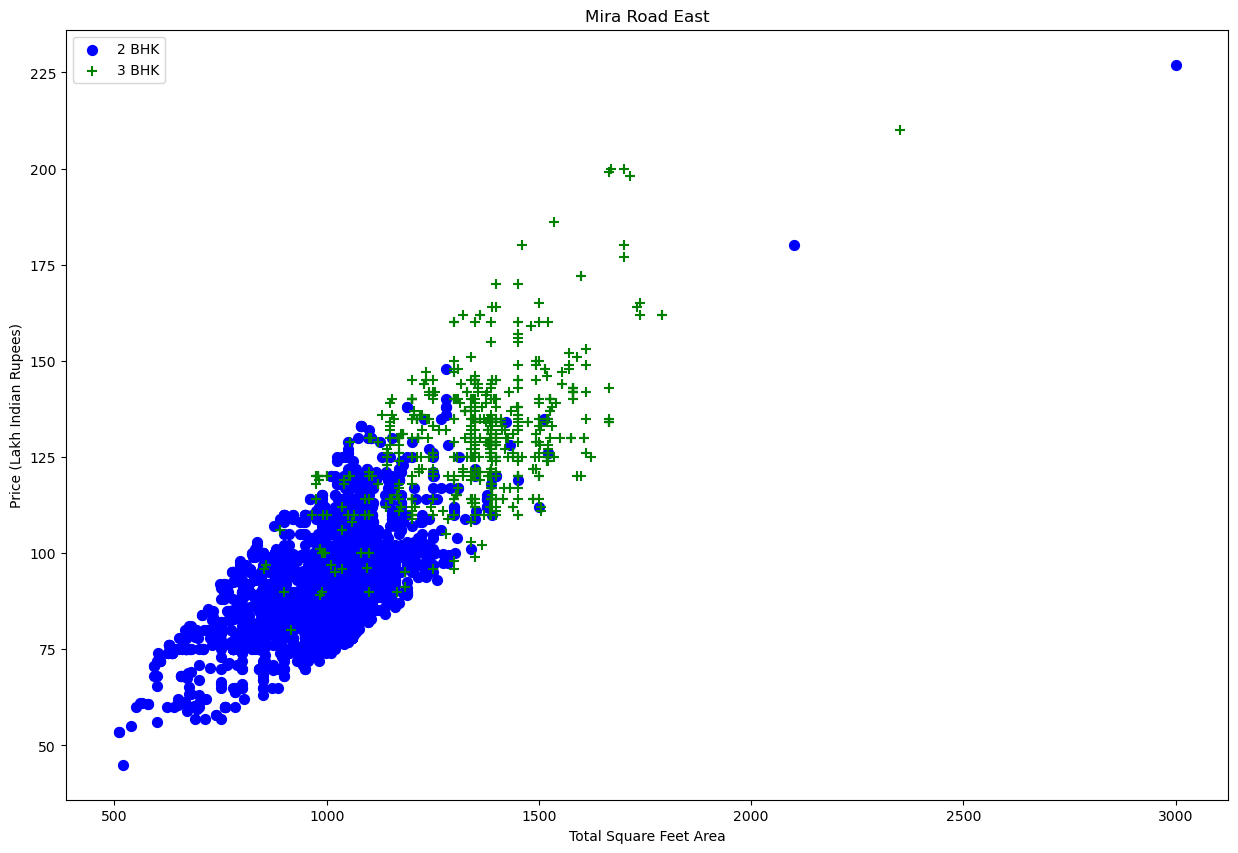

In [48]:
chart(df10,'Mira Road East')

In [49]:
df10.head()
df10.shape

(44828, 7)

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for region, region_df in df.groupby('region'):
        global bhk_stats
        bhk_stats = {}
        for bhk, bhk_df in region_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_sqft),
                'std': np.std(bhk_df.Price_per_sqft),
                'count': bhk_df.shape[0]
                
            }
        for bhk, bhk_df in region_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df11 = remove_bhk_outliers(df10)
print(df11.shape)

(31707, 7)


In [51]:
bhk_stats

{1: {'mean': 8466.946940876995, 'std': 4663.2391075129235, 'count': 151},
 2: {'mean': 8427.987682394947, 'std': 3929.076622742189, 'count': 79},
 3: {'mean': 13342.447580149614, 'std': 3406.827164565587, 'count': 32},
 4: {'mean': 8476.190476190477, 'std': 5793.629049752631, 'count': 3}}

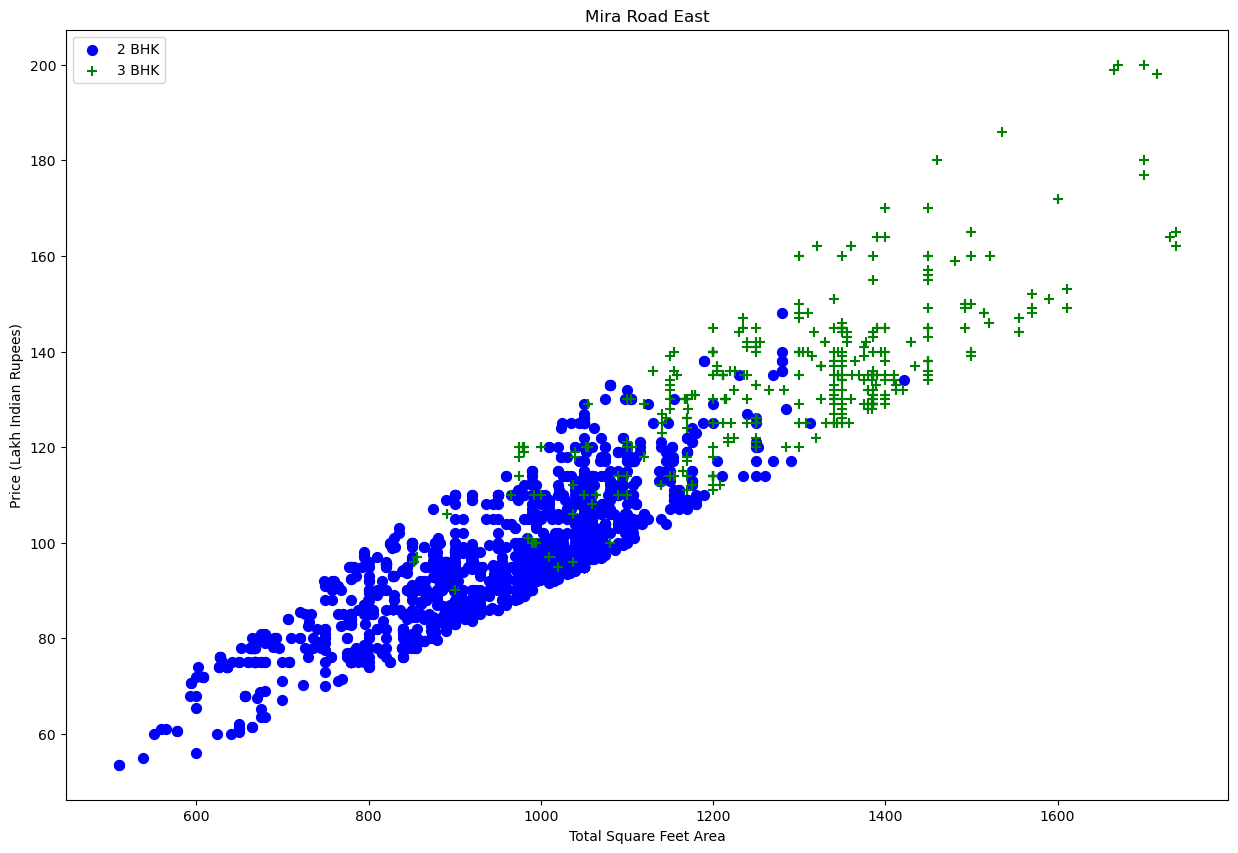

In [52]:
chart(df11,'Mira Road East')

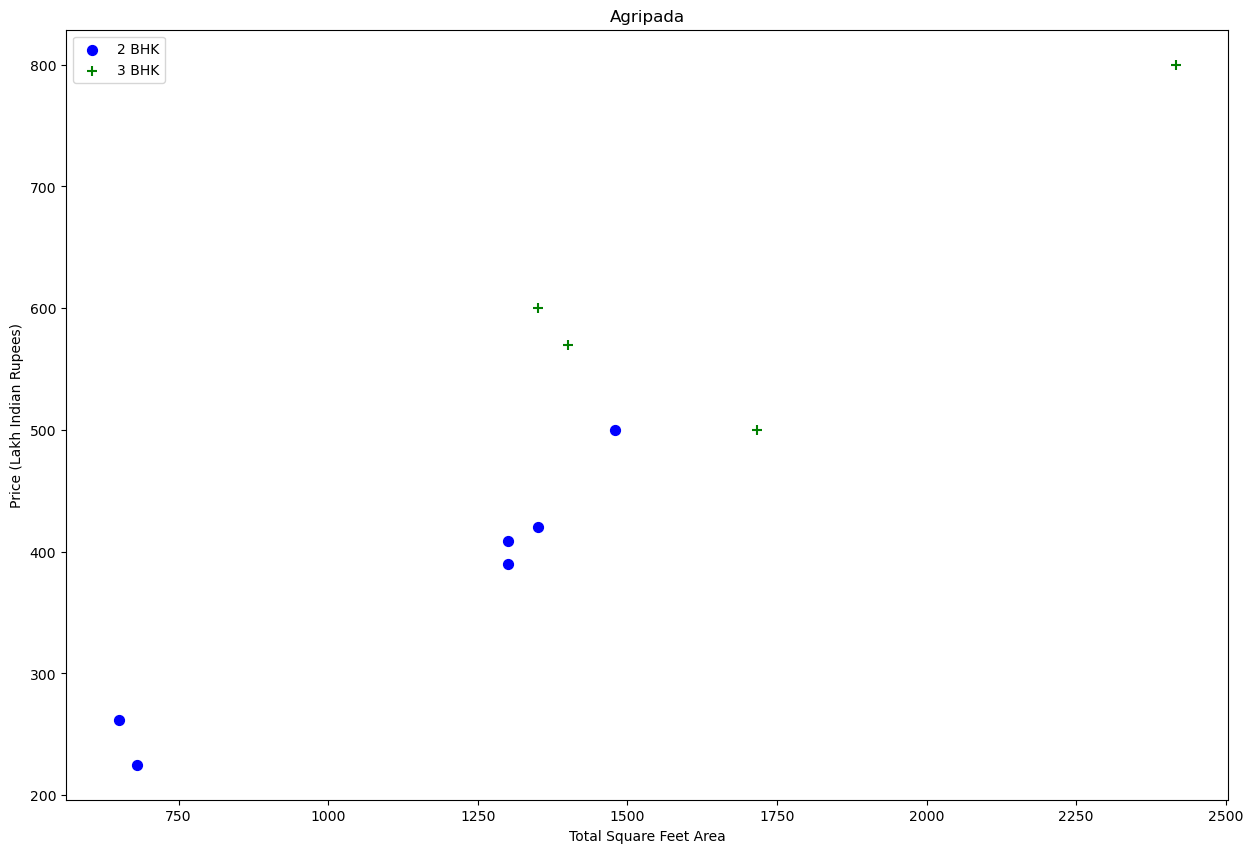

In [53]:
chart(df11,'Agripada')

In [54]:
df11.head()

,bhk,type,area,region,age,Price_in_Lakhs,Price_per_sqft
0,2,Apartment,650,Agripada,Resale,262.0,40307.692308
1,1,Apartment,803,Agripada,Resale,225.0,28019.925280
2,1,Apartment,684,Agripada,Resale,170.0,24853.801170
3,1,Apartment,545,Agripada,Resale,160.0,29357.798165
10,4,Apartment,3454,Agripada,New,1250.0,36189.924725


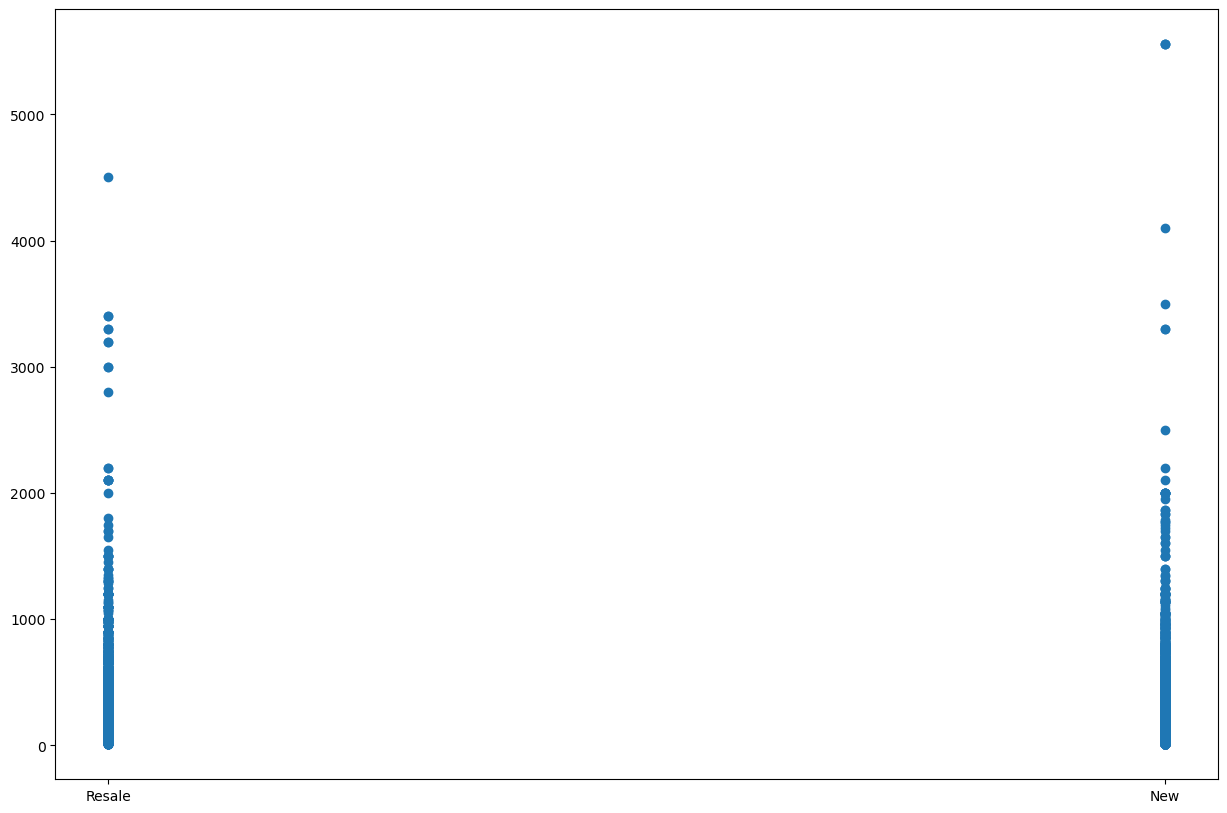

In [55]:
plt.scatter(df11.age,df11.Price_in_Lakhs)

In [56]:
df12=df11.drop(['Price_per_sqft'],axis='columns')
df12.head()

,bhk,type,area,region,age,Price_in_Lakhs
0,2,Apartment,650,Agripada,Resale,262.0
1,1,Apartment,803,Agripada,Resale,225.0
2,1,Apartment,684,Agripada,Resale,170.0
3,1,Apartment,545,Agripada,Resale,160.0
10,4,Apartment,3454,Agripada,New,1250.0


In [57]:
dummies=pd.get_dummies(df12.region)
dummies.head(20)

,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,Badlapur West,Bandra East,...,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
df13=pd.concat([df12,dummies.drop('other',axis='columns')],axis='columns')
df13.head()

,bhk,type,area,region,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,Apartment,650,Agripada,Resale,262.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Apartment,803,Agripada,Resale,225.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Apartment,684,Agripada,Resale,170.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Apartment,545,Agripada,Resale,160.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4,Apartment,3454,Agripada,New,1250.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df14=df13.drop('region',axis='columns')
df14.head()

,bhk,type,area,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,Apartment,650,Resale,262.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Apartment,803,Resale,225.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Apartment,684,Resale,170.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Apartment,545,Resale,160.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4,Apartment,3454,New,1250.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
x=df14.drop(['Price_in_Lakhs'],axis='columns')
x.head(10)

,bhk,type,area,age,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,...,Vangani,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli
0,2,Apartment,650,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Apartment,803,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Apartment,684,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Apartment,545,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,4,Apartment,3454,New,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,3,Apartment,2416,New,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,3,Apartment,1716,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23,1,Apartment,800,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,2,Apartment,1300,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,1,Apartment,800,Resale,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
dummies_2=pd.get_dummies(df14.type)
dummies_2.head(10)

,Apartment,Independent House,Studio Apartment,Villa
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
10,True,False,False,False
11,True,False,False,False
14,True,False,False,False
23,True,False,False,False
24,True,False,False,False
25,True,False,False,False


In [62]:
df15=pd.concat([df14,dummies_2.drop('Studio Apartment',axis='columns')],axis='columns')
df15.head()

,bhk,type,area,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,...,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa
0,2,Apartment,650,Resale,262.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,Apartment,803,Resale,225.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,Apartment,684,Resale,170.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,Apartment,545,Resale,160.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10,4,Apartment,3454,New,1250.0,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [63]:
df16=df15.drop('type',axis='columns')
df16.head()

,bhk,area,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,...,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa
0,2,650,Resale,262.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,803,Resale,225.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,684,Resale,170.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,545,Resale,160.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10,4,3454,New,1250.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [64]:
dummies_3=pd.get_dummies(df16.age)
dummies_3.head(10)

,New,Resale
0,False,True
1,False,True
2,False,True
3,False,True
10,True,False
11,True,False
14,False,True
23,False,True
24,False,True
25,False,True


In [65]:
df17=pd.concat([df16,dummies_3.drop('Resale',axis='columns')],axis='columns')
df17.head()

,bhk,area,age,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,...,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa,New
0,2,650,Resale,262.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,803,Resale,225.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,684,Resale,170.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,545,Resale,160.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,4,3454,New,1250.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [66]:
df18=df17.drop('age',axis='columns')
df18.head()

,bhk,area,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa,New
0,2,650,262.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,803,225.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,684,170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,545,160.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,4,3454,1250.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [67]:
df18.shape

(31707, 116)

In [68]:
x=df18.drop(['Price_in_Lakhs'],axis='columns')
x.head()

,bhk,area,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,...,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa,New
0,2,650,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,803,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,684,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,545,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,4,3454,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [69]:
x.shape

(31707, 115)

In [70]:
y=df18.Price_in_Lakhs
y.head()

0      262.0
1      225.0
2      170.0
3      160.0
10    1250.0
Name: Price_in_Lakhs, dtype: float64

In [71]:
len(y)

31707

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [73]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8727439888766216

In [74]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
model = LinearRegression()

scores = cross_val_score(model, x, y, cv=cv)

print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.87603928 0.87960113 0.86035107 0.87116025 0.85704421]
Mean score: 0.8688391859461939
Standard deviation: 0.008766044882158729


In [75]:
x.columns

Index(['bhk', 'area', 'Agripada', 'Airoli', 'Ambernath East', 'Ambernath West',
       'Andheri East', 'Andheri West', 'Anjurdive', 'Badlapur East',
       ...
       'Ville Parle East', 'Ville Parle West', 'Virar', 'Virar West', 'Wadala',
       'Worli', 'Apartment', 'Independent House', 'Villa', 'New'],
      dtype='object', length=115)

In [76]:
df18.head()

,bhk,area,Price_in_Lakhs,Agripada,Airoli,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,...,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,Apartment,Independent House,Villa,New
0,2,650,262.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,803,225.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,684,170.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1,545,160.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10,4,3454,1250.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [77]:
location='Agripada'
np.where(x.columns==location)[0][0]

2

In [78]:
def predict_price(location,sqft,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    X=np.zeros(len(x.columns))
    X[0] = bhk
    X[1] = sqft
    if loc_index >= 0:
        X[loc_index] = 1
        
    return lr_clf.predict([X])[0]

In [79]:
predict_price('Agripada',600, 2)

C:\Users\akans\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


282.0379854095472

In [80]:
predict_price('Andheri West',500, 2)

C:\Users\akans\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


178.37193291286252

In [81]:
predict_price('Airoli',1233, 4)

C:\Users\akans\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


216.00676953495613

In [82]:
import pickle
with open('Mumbai_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [83]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [84]:
predict_price('Airoli',600, 2)

C:\Users\akans\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


77.4673007584272